<font size=7>Speech to Text pada Anamnesis Keluhan Pasien untuk Bahasa Indonesia</font>
<br>
<font size=5>Teguh Puji Laksono</font>
<br>
<font size=4>14523043</font>

<h1>Latar Belakang</h1>

<h4>Anamnesis</h4>
<p>
Anamnesis adalah tahap awal dari rangkaian pemeriksaan dokter terhadap pasien yang bertujuan untuk mendapatkan informasi menyeluruh dari pasien. Data anamnesis tersebut dicatat oleh dokter untuk disimpan sebagai data rekam medis pasien.
</p>

<h4>Electronic Medical Record (EMR)</h4>
<p>
Dikarenakan pencatatan anamnesis dengan kertas memiliki kekurangan maka digunakan EMR sebagai media pencatatan anamnesis digital.
</p>

<h4>Speech to Text</h4>
<p>
Pencatatan anamnesis masih dilakukan dengan media kertas oleh dokter sehingga data anamesis tersebut harus dimasukkan manual kedalam EMR. Hal tersebut dapat dilakukan dengan speech to text.
</p>

<h1>Rumusan Masalah</h1>

<p>
Belum ada sistem yang mencatat anamnesis otomatis dengan menggunakan rekaman anamnesis pasien untuk dapat diintegrasikan dengan EMR.
</p>

<h1>Batasan Masalah</h1>

<ul>
  <li>Data rekaman anamnesis berupa Bahasa Indonesia dan Bahasa Jawa sesuai dengan daftar keluhan pasien.</li>
  <li>Hasil dari speech to text adalah keluhan pasien dalam bentuk satu kata yang berhubungan dengan daftar keluhan pasien yang dibuat.</li>
</ul>

<h1>Tujuan Penelitian</h1>

<p>
Membangun speech to text untuk mengambil keluhan pasien pada rekaman anamnesis berbahasa Indonesia dan Bahasa Jawa.
</p>

<h1>Manfaat Penelitian</h1>

<p>
Dapat memudahkan dalam pencatatan anamnesis kedalam EMR dan rekaman anamnesis tersebut juga dapat digunakan sebagai bagian dari data rekam medis pasien.
</p>

<h1>Perancangan Penelitian</h1>

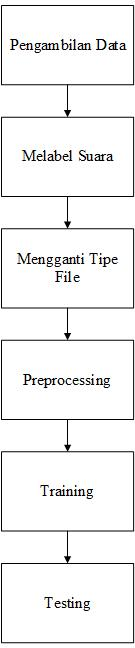

In [12]:
from IPython.display import Image

Image("data/flow.jpg")

<h1>Pengambilan Data</h1>

<p>
Pengambilan data dilakukan terhadap 10 narasumber dengan menggunakan 50 data keluhan pasien.
</p>

In [5]:
import pandas as pd

data = pd.read_csv('data/daftar_keluhan.csv', index_col=0, delimiter=';')
data

,Keluhan
No.,
1,Batuk
2,Bersin
3,Pusing
4,Demam
5,Gatal
6,Pilek
7,Mual
8,Muntah
9,Kembung


<h1>Pelabelan Suara</h1>

<p>
Pelabelan suara dilakukan pada setiap data pada data suara dengan menggunakan daftar keluhan pasien di atas.
</p>

<h1>Mengganti Tipe File</h1>

<p>
Pada tahap ini file audio yang sudah didapatkan diganti file tipe menjadi .wav dan .flac.
</p>

<h1>Preprocessing</h1>

<p>
Pada tahap preprocessing diambil Mel Frequency Cepstral Coefficient (MFCC) sebagai ekstraksi fitur pada file audio.
</p>

<h4>Mel Frequency Cepstral Coefficient (MFCC)</h4>
<p>
MFCC merupakan suatu cara untuk mengambil fitur pada gelombang audio dan mengubahnya menjadi nilai numerik sehingga dapat diproses lebih lanjut. Pada MFCC dilakukan beberapa tahap yaitu: pre-emphasis, frame blocking, Mel-scale dan Filter Bank.
</p>

<h4>Pre-emphasis</h4>
<p>
Pada tahap pre-emphasis gelombang yang memiliki frekuensi rendah akan dihapus sehingga hanya frekuensi yang tinggi saja yang didapatkan.
</p>

In [36]:
import IPython

name = 'asset/Dataset/wav/wav48/p225/p225_050.wav'
IPython.display.Audio(name)

In [2]:
from python_speech_features import mfcc
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from matplotlib import cm

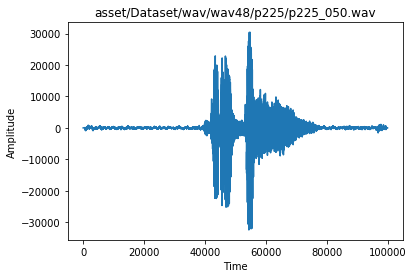

In [3]:
name = 'asset/Dataset/wav/wav48/p225/p225_050.wav'
plt.ylabel("Amplitude")
plt.xlabel("Time") 
plt.title(name)
sample_rate, signal = scipy.io.wavfile.read(name)  
signal = signal[0:int(100000)]
plt.plot(signal)
plt.show()

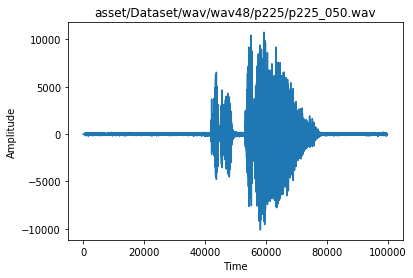

In [4]:
plt.ylabel("Amplitude")
plt.xlabel("Time") 
plt.title(name)
pre_emphasis = 0.97
emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])
plt.plot(emphasized_signal)
plt.show()

<h4>Frame Blocking</h4>
<p>
Pada tahap ini gelombang audio dipotong menjadi bagian yang lebih kecil yaitu dengan setiap potongan berjarak 20ms.
</p>

<h4>Mel-scale dan Filter Bank</h4>
<p>
Setelah gelombang audio dipotong pada frame blocking selanjutnya gelombang audio tersebut memasuki tahap Mel-scale dan Filter Bank untuk mendapatkan nilai MFCC.
</p>

In [5]:
mfcc_feat = mfcc(signal,sample_rate) 
mfcc_data = np.swapaxes(mfcc_feat, 0 ,1)
print mfcc_data

[[  8.96261601  12.77814887  12.74513413 ...  12.9533701   12.77378764
   12.73796292]
 [-12.72860106 -13.91107905 -15.87793958 ...  -9.88454827 -11.49835948
  -10.91706879]
 [  5.33893022  10.77444134  12.70626486 ...  20.81834779  17.60603699
   17.08071152]
 ...
 [  7.55972668   5.21810656   4.34737674 ... -14.86081233  -3.75643238
   -6.3881897 ]
 [ -3.45777826  -0.62304111   3.68930231 ...  -3.52282274  -1.59448202
   -6.86091379]
 [ -2.32670591 -13.16981301   2.05311679 ...   5.21959686  -4.26750084
   -7.83963545]]


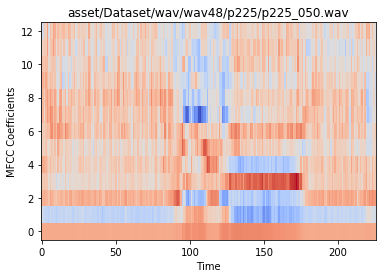

In [6]:
ig, ax = plt.subplots()
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
plt.ylabel("MFCC Coefficients")
plt.xlabel("Time") 
plt.title(name)
plt.show()

In [20]:
import csv

with open('asset/Dataset/preprocess/meta/train.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        print row

['p225_001.wav', '3', '2', '21', '22', '12']
['p225_002.wav', '3', '6', '19', '20', '10', '15']
['p225_003.wav', '17', '22', '20', '10', '15', '8']
['p225_004.wav', '5', '6', '14', '2', '14']
['p225_005.wav', '8', '2', '21', '2', '13']
['p225_006.wav', '17', '10', '13', '6', '12']
['p225_007.wav', '14', '22', '2', '13']
['p225_008.wav', '14', '22', '15', '21', '2', '9']
['p225_009.wav', '12', '6', '14', '3', '22', '15', '8']
['p225_010.wav', '17', '6', '19', '10', '9']
['p225_011.wav', '12', '19', '2', '14']
['p225_012.wav', '20', '6', '20', '2', '12']
['p225_013.wav', '20', '6', '20', '6', '12']
['p225_014.wav', '19', '2', '5', '2', '15', '8']
['p225_015.wav', '15', '26', '6', '19', '10']
['p225_016.wav', '20', '2', '19', '10', '2', '24', '2', '15']
['p225_017.wav', '17', '2', '15', '2', '20']
['p225_018.wav', '5', '10', '15', '8', '10', '15']
['p225_019.wav', '12', '6', '5', '10', '15', '8', '10', '15', '2', '15']
['p225_020.wav', '5', '10', '2', '19', '6']
['p225_021.wav', '14', '6'

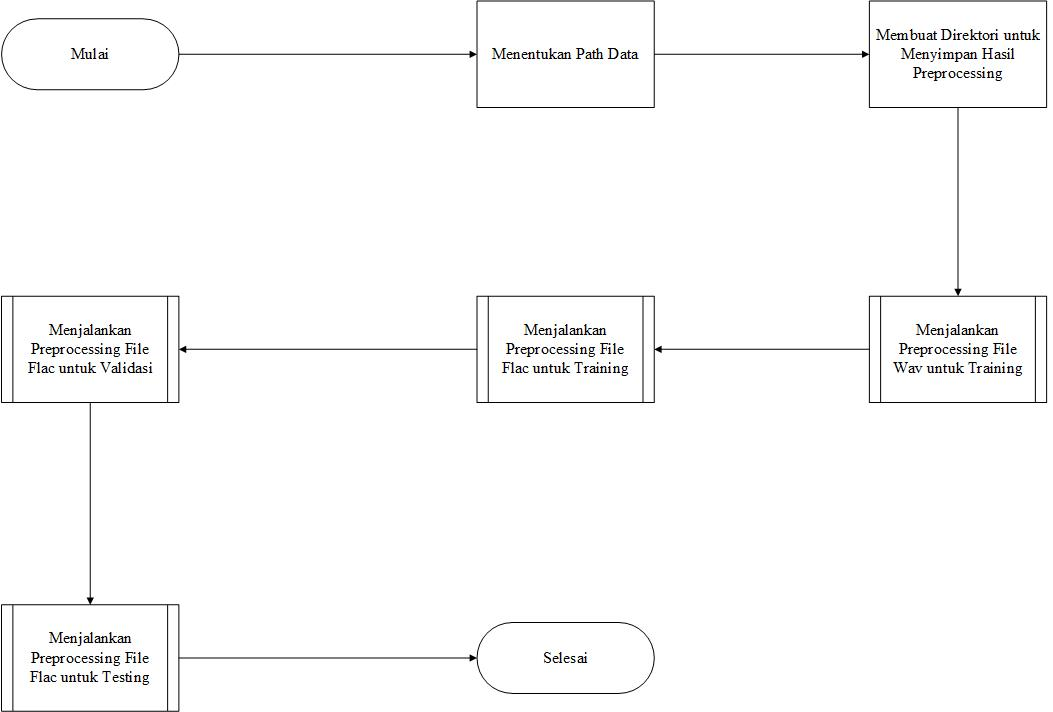

In [1]:
from IPython.display import Image

Image("data/preprocessing.jpg")

In [32]:
!cat preprocess.py

import tensorflow as tfs
tfs.logging.set_verbosity(tfs.logging.ERROR)
import numpy as np
import pandas as pd
import glob
import csv
import librosa
import scikits.audiolab
import data
import os
import subprocess

# path data
_data_path = "asset/Dataset/"

# prosedur process dataset wav
def process_wav(csv_file):

    # membuat csv writer
    writer = csv.writer(csv_file, delimiter=',')

    # membaca label info
    df = pd.read_table(_data_path + 'wav/speaker-info.txt', usecols=['ID'],
                       index_col=False, delim_whitespace=True)

    # membaca id file
    file_ids = []
    for d in [_data_path + 'wav/txt/p%d/' % uid for uid in df.ID.values]:
        file_ids.extend([f[-12:-4] for f in sorted(glob.glob(d + '*.txt'))])

    for i, f in enumerate(file_ids):

        # membaca filename pada data wav
        wave_file = _data_path + 'wav/wav48/%s/' % f[:4] + f + '.wav'
        fn = wave_file.split('/')[-1]
        target_filename = 'asset/Dataset/preprocess/mfcc/' + fn + '

In [33]:
!cat /home/teguh/Data/preprocess.txt

dataset wav preprocessing (0 / 500) - 'asset/Dataset/wav/wav48/p225/p225_001.wav']
dataset wav preprocessing (1 / 500) - 'asset/Dataset/wav/wav48/p225/p225_002.wav']
dataset wav preprocessing (2 / 500) - 'asset/Dataset/wav/wav48/p225/p225_003.wav']
dataset wav preprocessing (3 / 500) - 'asset/Dataset/wav/wav48/p225/p225_004.wav']
dataset wav preprocessing (4 / 500) - 'asset/Dataset/wav/wav48/p225/p225_005.wav']
dataset wav preprocessing (5 / 500) - 'asset/Dataset/wav/wav48/p225/p225_006.wav']
dataset wav preprocessing (6 / 500) - 'asset/Dataset/wav/wav48/p225/p225_007.wav']
dataset wav preprocessing (7 / 500) - 'asset/Dataset/wav/wav48/p225/p225_008.wav']
dataset wav preprocessing (8 / 500) - 'asset/Dataset/wav/wav48/p225/p225_009.wav']
dataset wav preprocessing (9 / 500) - 'asset/Dataset/wav/wav48/p225/p225_010.wav']
dataset wav preprocessing (10 / 500) - 'asset/Dataset/wav/wav48/p225/p225_011.wav']
dataset wav preprocessing (11 / 500) - 'asset/Dataset/wav/wav48/p225/p225_012.wav']
da

dataset flac preprocessing (146 / 500) - 'asset/Dataset/flac/test/24/24/24-24-0047.flac']
dataset flac preprocessing (147 / 500) - 'asset/Dataset/flac/test/24/24/24-24-0048.flac']
dataset flac preprocessing (148 / 500) - 'asset/Dataset/flac/test/24/24/24-24-0049.flac']
dataset flac preprocessing (149 / 500) - 'asset/Dataset/flac/test/24/24/24-24-0050.flac']
dataset flac preprocessing (150 / 500) - 'asset/Dataset/flac/test/21/21/21-21-0001.flac']
dataset flac preprocessing (151 / 500) - 'asset/Dataset/flac/test/21/21/21-21-0002.flac']
dataset flac preprocessing (152 / 500) - 'asset/Dataset/flac/test/21/21/21-21-0003.flac']
dataset flac preprocessing (153 / 500) - 'asset/Dataset/flac/test/21/21/21-21-0004.flac']
dataset flac preprocessing (154 / 500) - 'asset/Dataset/flac/test/21/21/21-21-0005.flac']
dataset flac preprocessing (155 / 500) - 'asset/Dataset/flac/test/21/21/21-21-0006.flac']
dataset flac preprocessing (156 / 500) - 'asset/Dataset/flac/test/21/21/21-21-0007.flac']
dataset fl

<h1>Training</h1>

<p>
Pada tahap training digunakan 500 data dari 10 narasumber dengan setiap narasumber mengucapkan 50 data keluhan pasien. Training dilakukan dengan menggunakan metode deep learning pada library sugartensor dan diambil nilai Connectionist Temporal Classification (CTC).
</p>

<h4>Deep Neural Learning</h4>
<p>
Deep neural network atau dapat disebut deep learning adalah metode pada artificial neural network dengan konsep jaringan syaraf. 
</p>

<h4>Connectionist Temporal Classification (CTC)</h4>
<p>
CTC adalah suatu metode yang digunakan pada neural network untuk mendapatkan nilai dari setiap epoch. Nilai tersebut akan mengalami pengurangan pada setiap epochnya atau dapat disebut nilai CTC loss.
</p>

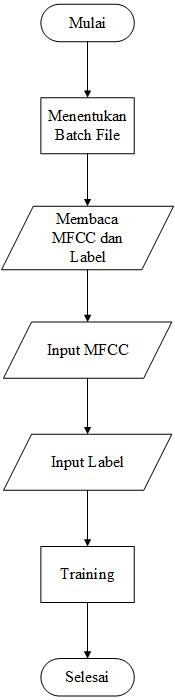

In [5]:
from IPython.display import Image

Image("data/training.jpg")

In [1]:
!cat train.py

import tensorflow as tfs
tfs.logging.set_verbosity(tfs.logging.ERROR)
import os
import sugartensor as tf
from data import SpeechCorpus, voca_size
from model import *
from tqdm import tqdm
tqdm.monitor_interval = 0

# mengatur log level untuk debug
tf.sg_verbosity(10)

# hyper parameters
batch_size = 16    # total batch size

# menginput corpus ke tensorflow
data = SpeechCorpus(batch_size=batch_size * tf.sg_gpus())

# menginput mfcc feature dari file audio
inputs = tf.split(data.mfcc, tf.sg_gpus(), axis=0)

# mengambil label
labels = tf.split(data.label, tf.sg_gpus(), axis=0)

# panjang sequence kecuali zero-padding
seq_len = []
for input_ in inputs:
    seq_len.append(tf.not_equal(input_.sg_sum(axis=2), 0.).sg_int().sg_sum(axis=1))

# pemprosesan parallel untuk mengambil loss
@tf.sg_parallel
def get_loss(opt):
    # encode audio feature
    logit = get_logit(opt.input[opt.gpu_index], voca_size=voca_size)
    # CTC loss
    return logit.sg_ctc(target=opt.target[opt.gpu_index], seq_len=o

In [24]:
!cat /home/teguh/Data/train.txt

I 0714:10:21:48.430:sg_train.py:327] Training started from epoch[000]-step[0].
I 0714:10:22:12.045:sg_train.py:301]    Epoch[000:gs=62] - loss = 22.830822
I 0714:10:22:27.012:sg_train.py:301]    Epoch[001:gs=124] - loss = 20.639340
I 0714:10:22:41.923:sg_train.py:301]    Epoch[002:gs=186] - loss = 18.132956
I 0714:10:22:56.748:sg_train.py:301]    Epoch[003:gs=248] - loss = 17.898919
I 0714:10:23:11.327:sg_train.py:301]    Epoch[004:gs=310] - loss = 33.879594
I 0714:10:23:25.952:sg_train.py:301]    Epoch[005:gs=372] - loss = 17.499906
I 0714:10:23:40.236:sg_train.py:301]    Epoch[006:gs=434] - loss = 17.145426
I 0714:10:23:54.807:sg_train.py:301]    Epoch[007:gs=496] - loss = 17.275030
I 0714:10:24:09.119:sg_train.py:301]    Epoch[008:gs=558] - loss = 17.372066
I 0714:10:24:23.449:sg_train.py:301]    Epoch[009:gs=620] - loss = 16.694771
I 0714:10:24:37.804:sg_train.py:301]    Epoch[010:gs=682] - loss = 16.799820
I 0714:10:24:52.353:sg_train.py:301]    Epoch[011:gs=744] - loss = 17.15289

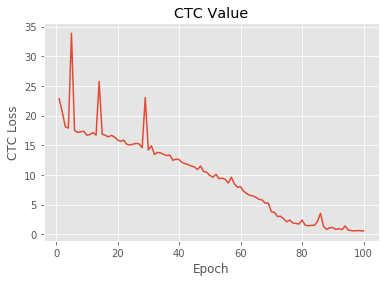

In [25]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')
x,y =np.loadtxt('data/ctc_loss.csv', unpack = True, delimiter = ';')
plt.plot(x,y)
plt.title('CTC Value')
plt.ylabel('CTC Loss')
plt.xlabel('Epoch')
plt.show()

<h1>Testing</h1>

<p>
Pada tahap testing digunakan 50 data baru dari narasumber yang berbeda dengan tahap training.
</p>

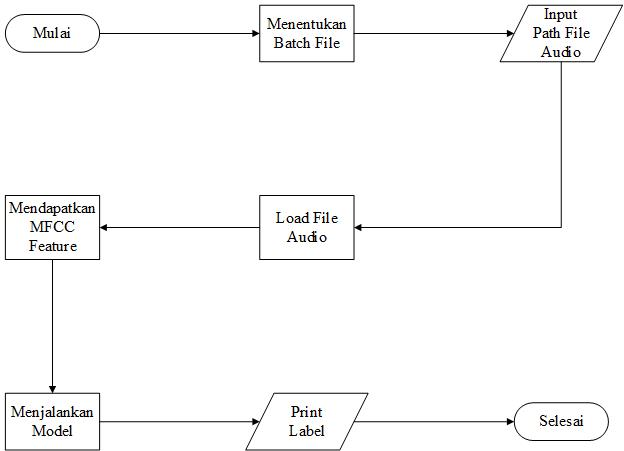

In [6]:
from IPython.display import Image

Image("data/testing.jpg")

In [26]:
!cat recognize.py

import tensorflow as tfs
tfs.logging.set_verbosity(tfs.logging.ERROR)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import sugartensor as tf
import numpy as np
import librosa
from model import *
import data
import sys

# mengatur log level untuk debug
tf.sg_verbosity(10)

# hyper parameters
batch_size = 1     # batch size

# inputs
# panjang kata
voca_size = data.voca_size

# menginput mfcc feature pada file audio
x = tf.placeholder(dtype=tf.sg_floatx, shape=(batch_size, None, 20))

# panjang sequence kecuali zero-padding
seq_len = tf.not_equal(x.sg_sum(axis=2), 0.).sg_int().sg_sum(axis=1)

# encode audio feature
logit = get_logit(x, voca_size=voca_size)

# ctc decoding
decoded, _ = tf.nn.ctc_beam_search_decoder(logit.sg_transpose(perm=[1, 0, 2]), seq_len, merge_repeated=False)

# to dense tensor
y = tf.sparse_to_dense(decoded[0].indices, decoded[0].dense_shape, decoded[0].values) + 1

# regcognize audio file

# perintah untuk menginput path file audio
tf.sg_arg_def(file=('', 'speec

In [2]:
import sys
import regex as re
from difflib import SequenceMatcher
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
def cleanSymbol(s):
    return re.sub(r'[^A-Za-z]+',' ',s)

file = open('asset/Dataset/flac/test/20/20/20-20.trans.txt','r')
i=1
array = []
tepat = 0
tidak_tepat = 0
print "==============================="
for line in file:
    if(i < 10):
        sys.stdout.write("Dataset: " + line)
        value = !eval {"python recognize.py asset/Dataset/flac/test/20/20/20-20-000{count}.flac".format(count=i)}
        result = ''.join(value)
        array.append(similar(str(cleanSymbol(line).lower().strip()), result))
        similarity = similar(str(cleanSymbol(line).lower().strip()), result)
        if(similarity == 1):
            print result
            print similarity
            print "Tepat"
        elif(similarity < 1 and similarity >= 0.75):
            print result
            print similarity
            print "Kurang Tepat"
        elif(similarity < 0.75):
            print result
            print similarity
            print "Tidak Tepat"
        if(similarity >= 0.75):
            #print str(cleanSymbol(line).lower().strip())
            #print "Tepat"
            tepat += 1
        else:
            #print result
            #print "Tidak Tepat"
            tidak_tepat += 1
        i += 1
        sys.stdout.flush()
        print "==============================="
    else:
        sys.stdout.write("Dataset: " + line)
        if(i == 50):
            print ""
        value = !eval {"python recognize.py asset/Dataset/flac/test/20/20/20-20-00{count}.flac".format(count=i)}
        result = ''.join(value)
        array.append(similar(str(cleanSymbol(line).lower().strip()), result))
        similarity = similar(str(cleanSymbol(line).lower().strip()), result)
        if(similarity == 1):
            print result
            print similarity
            print "Tepat"
        elif(similarity < 1 and similarity >= 0.75):
            print result
            print similarity
            print "Kurang Tepat"
        elif(similarity < 0.75):
            print result
            print similarity
            print "Tidak Tepat"
        if(similarity >= 0.75):
            #print str(cleanSymbol(line).lower().strip())
            #print "Tepat"
            tepat += 1
        else:
            #print result
            #print "Tidak Tepat"
            tidak_tepat += 1
        i += 1
        sys.stdout.flush()
        print "==============================="
print "Rata-rata: ", np.mean(array)
print "==============================="

Dataset: 20-20-0001 BATUK
keuk
0.444444444444
Tidak Tepat
Dataset: 20-20-0002 BERSIN
lirsin
0.666666666667
Tidak Tepat
Dataset: 20-20-0003 PUSING
pesing
0.833333333333
Kurang Tepat
Dataset: 20-20-0004 DEMAM
mema
0.666666666667
Tidak Tepat
Dataset: 20-20-0005 GATAL
gatol
0.8
Kurang Tepat
Dataset: 20-20-0006 PILEK
nelel
0.4
Tidak Tepat
Dataset: 20-20-0007 MUAL
mutal
0.888888888889
Kurang Tepat
Dataset: 20-20-0008 MUNTAH
muna
0.8
Kurang Tepat
Dataset: 20-20-0009 KEMBUNG
pembang
0.714285714286
Tidak Tepat
Dataset: 20-20-0010 PERIH
lerih
0.8
Kurang Tepat
Dataset: 20-20-0011 KRAM
kaam
0.75
Kurang Tepat
Dataset: 20-20-0012 SESAK
kesak
0.8
Kurang Tepat
Dataset: 20-20-0013 SESEK
kese
0.666666666667
Tidak Tepat
Dataset: 20-20-0014 RADANG
merdang
0.769230769231
Kurang Tepat
Dataset: 20-20-0015 NYERI
nyeri
1.0
Tepat
Dataset: 20-20-0016 SARIAWAN
sariawan
1.0
Tepat
Dataset: 20-20-0017 PANAS
pans
0.888888888889
Kurang Tepat
Dataset: 20-20-0018 DINGIN
dingin
1.0
Tepat
Dataset: 20-20-0019 KEDINGINAN
ke

In [29]:
print "Jumlah Tepat: ", tepat
print "Jumlah Tidak Tepat: ", tidak_tepat
hasil = (tepat/float(tepat + tidak_tepat))*100
print "Akurasi: ", hasil, "%"

Jumlah Tepat:  32
Jumlah Tidak Tepat:  18
Akurasi:  64.0 %


<h1>Kelebihan dan Kekurangan</h1>

<h4>Kelebihan</h4>
<ul>
  <li>Speech to text dapat digunakan untuk memproses data dengan tipe wav dan flac.</li>
  <li>Speech to text dapat digunakan dalam Bahasa Indonesia dan Bahasa Jawa.</li>
 <li>Speech to text dapat mengenali 50 kata keluhan pada pasien walaupun belum sempurna</li>
</ul>

<h4>Kekurangan</h4>
<ul>
  <li>Pada speech to text ini belum bisa mengenali lebih dari satu kata.</li>
  <li>Dataset yang digunakan masih terbatas.</li>
  <li>Semakin besar dataset maka komputasi yang digunakan juga semakin besar.</li>
</ul>

<h1>Saran dan Kesimpulan</h1>

<h4>Kesimpulan</h4>
<ul>
  <li>Speech to text dapat digunakan sebagai analisis pada data suara atau rekaman pada keluhan pasien.</li>
  <li>Speech to text dapat memproses data dalam bentuk file wav dan file flac.</li>
  <li>Speech to text dapat mengenali dalam Bahasa Indonesia dan Bahasa Jawa.</li>
  <li>Akurasi yang dihasilkan sudah menunjukan beberapa kata yang ada dalam daftar label.</li>
</ul>

<h4>Saran</h4>
<ul>
  <li>Dataset yang digunakan dapat ditambah yaitu data suara beserta labelnya.</li>
  <li>Dapat memasukkan kata lebih dari dua atau kalimat pada dataset, sehingga speech to text dapat mengenali kata lebih dari dua pada tahap pembelajarannya.</li>
  <li>Dapat memasukkan bahasa lain seperti bahasa asing sebagai dataset, sehingga speech to text dapat belajar bahasa tersebut pada tahap training.</li>
  <li>Dapat menggunakan masalah lain selain keluhan pasien, seperti: pengenalan suara pada conversation atau percakapan dua orang atau lebih.</li>
  <li>Dapat dibuat dashboard yang lebih dinamis sebagai visualisasi yaitu dengan tampilan web, sehingga speech to text dapat diakses secara bebas.</li>
</ul>

<font size=7>TERIMA KASIH

In [1]:
import IPython

name = 'test/1.m4a'
IPython.display.Audio(name)

In [ ]:
name = 'test/2.m4a'
IPython.display.Audio(name)

In [ ]:
name = 'test/3.m4a'
IPython.display.Audio(name)

In [ ]:
name = 'test/4.m4a'
IPython.display.Audio(name)

In [ ]:
name = 'test/5.m4a'
IPython.display.Audio(name)

In [2]:
from difflib import SequenceMatcher
import sys

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [3]:
value = !python recognize.py test/1.m4a
result = ''.join(value)
print result
print similar("sembelit", result)

nereli
0.571428571429


In [4]:
value = !python recognize.py test/2.m4a
result = ''.join(value)
print result
print similar("alergi", result)

aergi
0.909090909091


In [5]:
value = !python recognize.py test/3.m4a
result = ''.join(value)
print result
print similar("kedinginan", result)

kedinginun
0.9
